In [2]:
from useful_scit.imps import *

In [3]:
path = '/homeappl/home/aliagadi/wrk/DONOTREMOVE/wrf_management_data/runs/run_2019_02_28_2'

In [4]:
wrf_path = pjoin(path,'wrf') 

In [5]:
fls = glob.glob(pjoin(wrf_path,'wrf*'))
dffile = pd.DataFrame(fls,columns=['path'])
b1 = ~dffile.path.str.contains('wrfout')
b2 = ~dffile.path.str.contains('wrf.exe')
dffile = dffile[b1 & b2]
dffile['bname']=dffile.path.apply(lambda p: os.path.basename(p))
dffile = dffile[['bname','path']]
dffile = dffile.sort_values('bname')

b = dffile.bname =='wrffdda_d01'
nudge01 = dffile[b].iloc[0].path



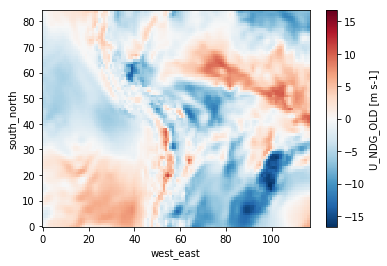

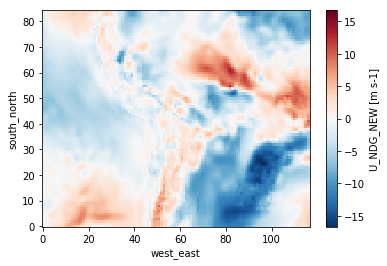

In [6]:
dsn01 = xr.open_dataset(nudge01)
ti, bt, = 40, 5,
dsn01.U_NDG_OLD[ti,bt].plot()
plt.subplots()
dsn01.U_NDG_NEW[ti,bt].plot()



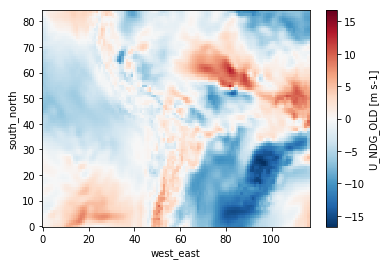

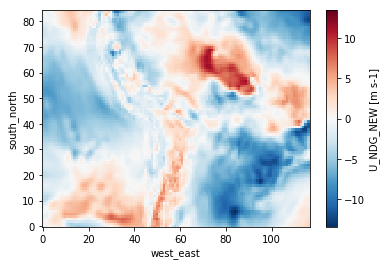

In [7]:
dsn01 = xr.open_dataset(nudge01)
ti, bt, = 41, 5,
dsn01.U_NDG_OLD[ti,bt].plot()
plt.subplots()
dsn01.U_NDG_NEW[ti,bt].plot()



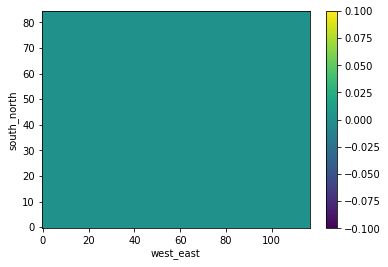

In [8]:
(
    dsn01.U_NDG_NEW[40,5] - \
    dsn01.U_NDG_OLD[41,5]
).plot()

In [9]:
dsn01.U_NDG_NEW

<xarray.DataArray 'U_NDG_NEW' (Time: 83, bottom_top: 49, south_north: 85, west_east: 117)>
[40446315 values with dtype=float32]
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  NEW X WIND FOR FDDA GRID NUDGING
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME

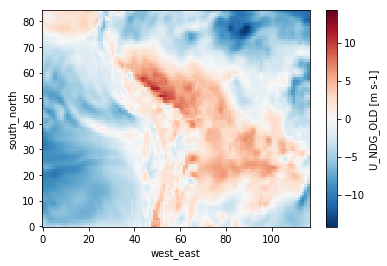

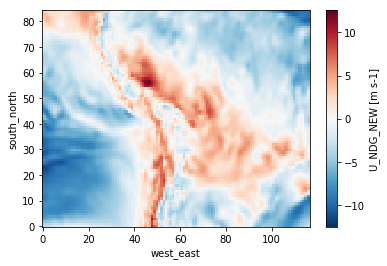

In [10]:
dsn01 = xr.open_dataset(nudge01)
ti, bt, = 82, 5,
dsn01.U_NDG_OLD[ti,bt].plot()
plt.subplots()
dsn01.U_NDG_NEW[ti,bt].plot()



In [11]:
dsn01.MU_NDG_NEW



<xarray.DataArray 'MU_NDG_NEW' (Time: 83, one_stag: 1, south_north: 85, west_east: 117)>
[825435 values with dtype=float32]
Dimensions without coordinates: Time, one_stag, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  NEW PERT COLUMN DRY MASS FOR FDDA GRID NUDGING
    units:        Pa
    stagger:      Z
    coordinates:  XLONG XLAT XTIME

In [12]:
dffile = dffile.set_index('bname')

In [13]:
in01 = dffile.loc['wrfinput_d01'].path

In [14]:
din01 = xr.open_dataset(in01)
din01.dims

Frozen(SortedKeysDict({'Time': 1, 'south_north': 85, 'west_east': 117, 'bottom_top': 49, 'bottom_top_stag': 50, 'soil_layers_stag': 4, 'dust_erosion_dimension': 3, 'west_east_stag': 118, 'south_north_stag': 86, 'DIM0010': 5, 'land_cat_stag': 21, 'soil_cat_stag': 16, 'num_ext_model_couple_dom_stag': 1}))

In [15]:
bd01 = dffile.loc['wrfbdy_d01'].path
dbd01 = xr.open_dataset(bd01)
dbd01

<xarray.Dataset>
Dimensions:                                          (Time: 83, bdy_width: 5, bottom_top: 49, bottom_top_stag: 50, south_north: 85, south_north_stag: 86, west_east: 117, west_east_stag: 118)
Dimensions without coordinates: Time, bdy_width, bottom_top, bottom_top_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                                            (Time) |S19 ...
    md___thisbdytimee_x_t_d_o_m_a_i_n_m_e_t_a_data_  (Time) |S19 ...
    md___nextbdytimee_x_t_d_o_m_a_i_n_m_e_t_a_data_  (Time) |S19 ...
    U_BXS                                            (Time, bdy_width, bottom_top, south_north) float32 ...
    U_BXE                                            (Time, bdy_width, bottom_top, south_north) float32 ...
    U_BYS                                            (Time, bdy_width, bottom_top, west_east_stag) float32 ...
    U_BYE                                            (Time, bdy_width, bottom_top, west_east_stag) float32 

In [22]:
i1=dffile.loc['wrfinput_d01'].path
di1 = xr.open_dataset(i1)
lus = ['LANDUSEF','LAKE_DEPTH','LU_INDEX']
for l in lus:
    print(di1[l])
    print('------')

<xarray.DataArray 'LANDUSEF' (Time: 1, land_cat_stag: 21, south_north: 85, west_east: 117)>
[208845 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, land_cat_stag, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  LANDUSE FRACTION BY CATEGORY
    units:        
    stagger:      Z
    coordinates:  XLONG XLAT XTIME
------
<xarray.DataArray 'LAKE_DEPTH' (Time: 1, south_north: 85, west_east: 117)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description: 

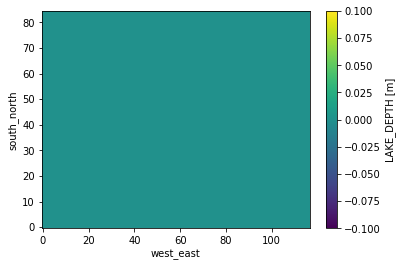

In [26]:
di1.LAKE_DEPTH[0].plot()

(array([42637.,  4403.,  2301.,  1451.,  1072.,   754.,   583.,   528.,
          567.,  5419.]),
 array([4.3402778e-04, 1.0039063e-01, 2.0034721e-01, 3.0030382e-01,
        4.0026042e-01, 5.0021702e-01, 6.0017359e-01, 7.0013022e-01,
        8.0008680e-01, 9.0004343e-01, 1.0000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

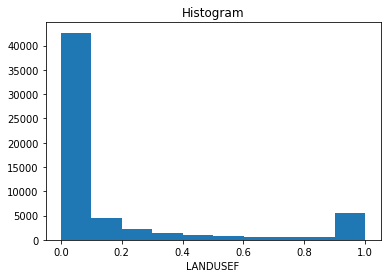

In [30]:
di1.LANDUSEF.where(di1.LANDUSEF>0).plot()

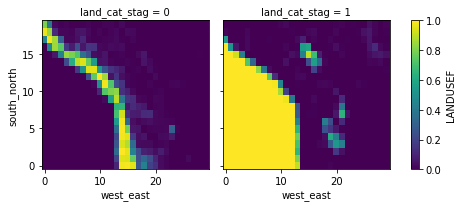

In [44]:
di1.LANDUSEF[0,15:17,30:50,35:65].plot(col='land_cat_stag',col_wrap=2)

Text(0.5, 1.0, 'water=17')

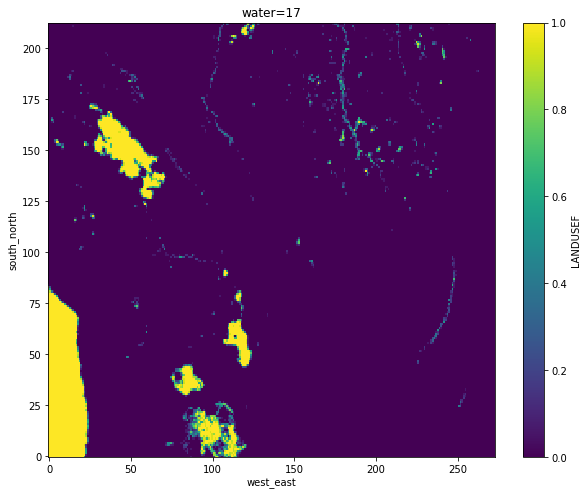

In [54]:
i1=dffile.loc['wrfinput_d03'].path
di1 = xr.open_dataset(i1)
di1.LANDUSEF[0,16].plot(figsize=(10,8))
ax = plt.gca()
ax.set_title('water=17')

In [59]:
l1 = dffile.loc['wrflowinp_d01'].path
dl1 = xr.open_dataset(l1)

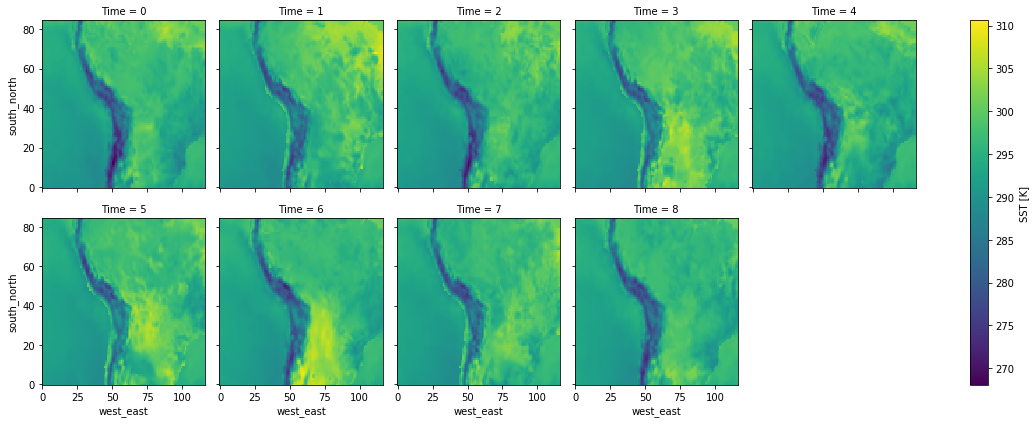

In [63]:
dl1.SST[0:84:10].plot(col='Time',col_wrap=5)

In [72]:
_df = dl1[['Times','SST']].to_dataframe()

In [98]:
_df = _df.reset_index(drop=True)
_df.Times = pd.to_datetime(_df.Times.str.decode('utf-8'),format='%Y-%m-%d_%H:%M:%S')

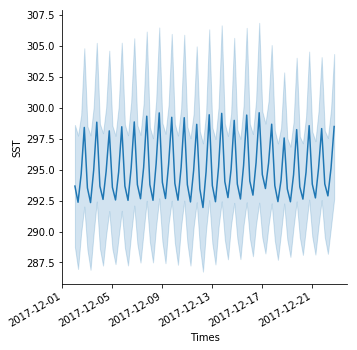

In [104]:
sns.relplot(x='Times',y='SST',data=_df,kind='line',ci='sd')
fig = plt.gcf()
fig.autofmt_xdate()

In [148]:
vas = list(dl1.variables)
for v in vas:
    try:
        p = dl1[v].description
        print(v,p)
    except: 
        pass

SEAICE SEA ICE FLAG
VEGFRA VEGETATION FRACTION
UOCE SEA SURFACE ZONAL CURRENTS
VOCE SEA SURFACE MERIDIONAL CURRENTS
LAI LEAF AREA INDEX
ALBBCK BACKGROUND ALBEDO
SST SEA SURFACE TEMPERATURE


In [144]:
dl1[v].description

'SEA SURFACE TEMPERATURE'